# QC Linealidad  radionuclide (Dose) calibrator in NM

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos
################################
######  MEDICINA NUCLEAR #######
################################

###Activimetro CRC 25 PET con fuente Cs-137
#data = pd.read_csv('testlinealidad.txt', delim_whitespace =True)
#data = pd.read_csv('lineapet.txt', delim_whitespace =True)
#data = pd.read_csv('linealidadpet8.txt', delim_whitespace =True)
###Activimetro 55tR con fuente Co-57
data = pd.read_csv('lineatr19.txt', delim_whitespace =True)




#para ver los primeros datos
data.head()

,Tiempo,actividad
0,0,21.60
1,60,19.28
2,120,17.20
3,180,15.31
4,240,13.64


In [376]:
#data.describe()
data.dtypes

Tiempo         int64
actividad    float64
dtype: object

In [377]:
##### de mCi a Bq
mcibq=3.7E7
##### de uCi a Bq
ucibq=3.7E4

### half life  [minutos]
HL= 110
### half life [s]
HLbq= HL*60
### Tau [s]
Taubq= HLbq/np.log(2)

In [378]:
#plt.plot(data['Tiempo'],data['actividad'],'ob')
#plt.yscale('log')

In [379]:
data['ActBq']=data['actividad']*mcibq
data['ActMBq']=data['ActBq']/1.0E6
data['IncerBq']=np.sqrt(data['ActBq'])
data['RaizMBq']=np.sqrt(data['ActMBq'])
#data['IncerMBq']=data['IncerBq']/1.0E6
data['Raizmci']=np.sqrt(data['actividad'])
#data['incerti']=data['IncerBq']/mcibq

In [380]:
data['LN']=np.log(data['ActMBq'])
#data['LN']=np.log(data['Cuentas'])
#data['LN']=np.log(data['actividad'])

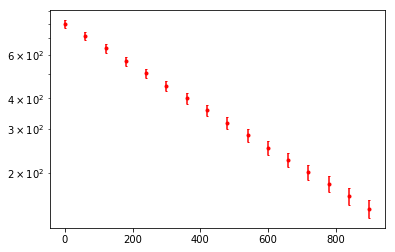

In [382]:
plt.errorbar(data['Tiempo'],data['ActMBq'], yerr=data['RaizMBq'],fmt='.r',label='Experimento',capsize=1)
plt.yscale('log')

## Notas de Clase -Física Experimental II - Capítulo 6

Función a ajustar: 

$$A(t) = A_o e^{-t/\tau}$$

que se puede linealizar tomando el logaritmo natural a ambos lados: 

$$\text{ln} \;A(t) =\text{ln}\; A_o-\frac{t}{\tau}$$

tal que:

$$
\begin{align}
f(t) = \text{ln}\;A(t)\\
a=\text{ln}\; A_o\\
b=-\frac{1}{\tau}
\end{align}
$$


In [383]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [384]:
X = data[['Tiempo']]
Y = data['LN']

In [385]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [386]:
# Slope 
bl=lm.coef_

In [387]:
# Intercept
al=lm.intercept_

In [388]:
### Número de cuentas N_o, será entonces: 
#No= 
np.exp(al)
#al

798.58542148339632

In [389]:
### Vida media 
-1/bl
#bl

array([ 522.72924847])

### Ajuste por el metodo de mínimos cuadrados 

$$
\begin{align}
y(t) = \text{ln}\;A(t)\\
\sigma_y^2=\left[\frac{dy}{dA}\right]^2\sigma_A^2\\
\sigma_y^2=\frac{1}{A^2} (\sqrt{A})^2=\frac{1}{A}
\end{align}
$$

#### Pesos    $w = 1/\sigma^2$

In [390]:
w= data['ActMBq']
#w= data['Cuentas']
#w= data['actividad']

In [391]:
S=sum(w)


$$
\begin{align}
S= \sum \frac{1}{\sigma_i^2}  \; \; \; S_x= \sum \frac{x_i}{\sigma_i^2}\; \; \; S_y= \sum \frac{y_i}{\sigma_i^2}\\
 S_{xx}= \sum \frac{x_i^2}{\sigma_i^2}\; \; \; S_{xy}= \sum \frac{x_iy_i}{\sigma_i^2}
\end{align}
$$

In [392]:
x=data['Tiempo']*w

In [393]:
Sx=sum(x)

In [394]:
xx=((data['Tiempo'])**2)*w

In [395]:
Sxx=sum(xx)

In [396]:
y=data['LN']*w

In [397]:
Sy=sum(y)

In [398]:
xy=(data['Tiempo']*data['LN'])*w

In [399]:
Sxy=sum(xy)

$$
\begin{align}
f(t)= a+bt\\
a=\frac{1}{\Delta}(S_{xx}S_{y}-S_xS_{xy})\\
b=\frac{1}{\Delta}(SS_{xy}-S_xS_y)\\
\Delta= SS_{xx}-(S_x)^2
\end{align}
$$


In [400]:
### Calculando Delta 
det=(S*Sxx)-(Sx)**2

### Ajuste con pesos de a y b 

In [401]:
a=((Sxx*Sy)-(Sx*Sxy))/det
a

6.6839344647522676

In [402]:
b=((S*Sxy)-(Sx*Sy))/det
b

-0.0019158698522029369

#### Incertidumbres

$$
\begin{align}
\text{error a}=\sqrt{\frac{S_{xx}}{\Delta}}\\
\text{error b}=\sqrt{\frac{S}{\Delta}}\\
\end{align}
$$

In [403]:
# incertidumbre acm
inca= np.sqrt(Sxx/det)
# incertidumbre bcm
incb=np.sqrt(S/det)

In [404]:
#inca

### Calculo de Vida media  $\tau$ y $N_o$

$$
\begin{align}
\tau=-\frac{1}{b}\\
e^a= N_o
\end{align}
$$

In [405]:
### Vida Media 
tau=-1/b
tau

521.95612288077064

In [406]:
### Cuentas
cuen=np.exp(a)
cuen

799.45837310008199

In [407]:
###Actividad en MBq
#A=(cuen)*np.exp(-(data['Tiempo']/tau))/1.0E6
#N=(cuen)*np.exp(-(data['Tiempo']/tau))
A=(cuen)*np.exp(-(data['Tiempo']/tau))

#### Incertidumbres  vida media y cuentas 

$$
\begin{align}
\sigma^2 (a)=\left[\frac{da}{dN_o}\right]^2\sigma^2 (N_o) \; \; \; \; \sigma (N_o)= N_o \sigma (a)\\
\sigma^2 (\tau)=\left[\frac{d\tau}{db}\right]^2\sigma^2 (b) \; \; \; \; \sigma (\tau)=\frac{1}{b^2} \sigma (b)
\end{align}
$$

In [408]:
inccuen= cuen*inca
inccuen

16.01808560460773

In [409]:
inctau=incb/(b**2)
inctau

13.564586826377973

In [410]:
#data['incerti']=data['actividad']*0.0182
#data['incerti']=np.sqrt(data['Cuentas'])
data.tail()

,Tiempo,actividad,ActBq,ActMBq,IncerBq,RaizMBq,Raizmci,LN
11,660,6.08,224960000.0,224.96,14998.666607,14.998667,2.465766,5.415923
12,720,5.42,200540000.0,200.54,14161.214637,14.161215,2.328089,5.301014
13,780,4.88,180560000.0,180.56,13437.261626,13.437262,2.209072,5.196063
14,840,4.35,160950000.0,160.95,12686.607111,12.686607,2.085665,5.081094
15,900,3.87,143190000.0,143.19,11966.202405,11.966202,1.967232,4.964172


In [411]:
# import the visualization package: seaborn
#import seaborn as sns
#sns.set_context("talk",font_scale=1.4)

###  Visualización 

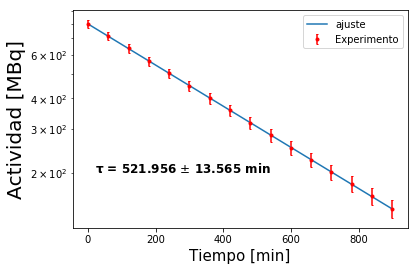

In [419]:
#plt.errorbar(data['Tiempo'],data['ActMBq'], yerr=data['IncerMBq'],fmt='.r',label='Experimento',capsize=1)
plt.errorbar(data['Tiempo'],data['ActMBq'], yerr=data['RaizMBq'],fmt='.r',label='Experimento',capsize=1)
#plt.errorbar(data['Tiempo'],data['Cuentas'], yerr=data['incerti'],fmt='.r',label='Experimento',capsize=1)
#plt.errorbar(data['Tiempo'],data['actividad'], yerr=data['Raizmci'],fmt='.r',label='Experimento',capsize=1)
#plt.plot(data['Tiempo'],N,label='ajuste')
plt.plot(data['Tiempo'],A,label='ajuste')
plt.xlabel(r'Tiempo [min]',size=15)
plt.ylabel(r'Actividad [MBq]',size=20)
#plt.ylabel(r'Actividad [mCi]',size=20)

tx=r'$\mathbf{{\tau}}$ = {:.3f} $\pm$ {:.3f} min'
plt.annotate(tx.format(tau,inctau),xy=(20, 200), fontsize=12, fontweight="bold")
plt.legend()
#plt.ylim(1E-20,1E2)
plt.yscale('log')
#plt.savefig('eficazcm.pdf')

In [420]:
(tau*np.log(2))/60

6.0298735825134422

In [421]:
(inctau*np.log(2))/60

0.15670425190274115

### Que tan bueno es el ajuste? - Chi cuadrado

In [184]:
#data['LN']
#((data['LN']-(a+(b*data['Tiempo'])))/data['incerti'])**2

In [424]:
#chicuadrado= sum(((data['Cuentas']-np.round(cuen*np.exp(b*data['Tiempo']),0))/data['incerti'])**2)
chicuadrado= sum(((data['ActMBq']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['RaizMBq'])**2)
#chicuadrado= sum(((data['actividad']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['Raizmci'])**2)
chicuadrado

0.032453455015238969

In [427]:
#sum(((data['actividad']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['Raizmci'])**2)
sum(((data['ActMBq']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['RaizMBq'])**2)

0.032453455015238969

In [431]:
### Número de grados de libertad= Número de puntos independientes a ajustar - Número de parámetros por hallar (2 línea Recta)
libertad= len(data['Tiempo'])-2
libertad

14

In [434]:
###Chi cuadrado reducido
chicuadrado/libertad

0.0023181039296599265

### Distribución acumulativa Chi-cuadrado

en una terminal ejecute el programa maxima
y escriba: 



gamma_incomplete_regularized(chicuadrado/2,libertad/2);

Nivel de confianza convencional en Física= CL = 0.05



16